In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Red Wine Dataset

Read the file and show the first five entries.

In [2]:
df=pd.read_csv('winequality-red-mod.csv')
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,flavonoids,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,country,quality
0,1,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,UK,5
1,2,7.8,0.88,0.00,2.6,0.754,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Italy,5
2,3,7.8,0.76,0.04,2.3,0.688,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Italy,5
3,4,11.2,0.28,0.56,1.9,0.459,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Spain,6
4,5,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,UK,5


In [3]:
df.columns = [x.strip().replace(' ','_') for x in df.columns]

In [4]:
print(f'There are {df.shape[1]} features and {df.shape[0]} entries in the dataset. ')
print(f'The features names(columns names)are \n{df.columns.values} ')

There are 15 features and 1506 entries in the dataset. 
The features names(columns names)are 
['id' 'fixed_acidity' 'volatile_acidity' 'citric_acid' 'residual_sugar'
 'flavonoids' 'chlorides' 'free_sulfur_dioxide' 'total_sulfur_dioxide'
 'density' 'pH' 'sulphates' 'alcohol' 'country' 'quality'] 


## detect Missing Values

The first method is by seaborn.heatmap. 
The next single-line code will visualize the location of missing values.

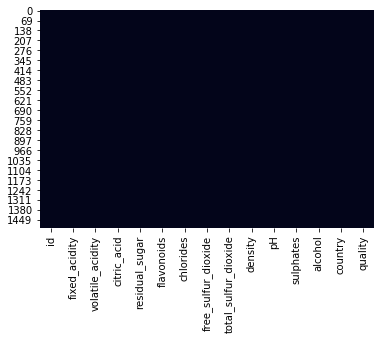

In [5]:
sns.heatmap(df.isnull(), cbar=False)

## Data distribution
Check how many unique values does the target feature 'quality' has and how data is distributed among those values?

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df.quality.value_counts().sort_index()

3     10
4     54
5    644
6    586
7    195
8     17
Name: quality, dtype: int64

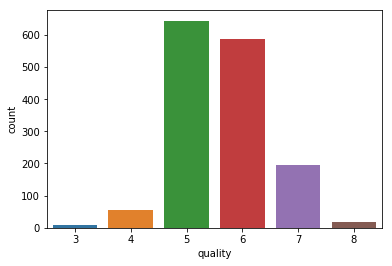

In [8]:
sns.countplot(x='quality', data=df)

      bad: 3-4

      average: 5-6
      
      good: 7-10

In [254]:
'''
df['grade'] = 'good' # good
df.loc[df.quality < 7,'grade'] = 'average' # not good
df.loc[df.quality < 5,'grade'] = 'bad' # not good


####or
low = df.loc[df['quality'] < 5].copy()
medium = df.loc[(df['quality'] == 5) | (df['quality'] == 6)].copy()
high = df.loc[df['quality'] > 6].copy()

low['grade']='low'
medium['grade']='medium'
high['grade']='high'
frames = [low, medium, high]
wine=pd.concat(frames)
'''

"\n####or\nlow = df.loc[df['quality'] < 5].copy()\nmedium = df.loc[(df['quality'] == 5) | (df['quality'] == 6)].copy()\nhigh = df.loc[df['quality'] > 6].copy()\n\nlow['grade']='low'\nmedium['grade']='medium'\nhigh['grade']='high'\nframes = [low, medium, high]\nwine=pd.concat(frames)\n"

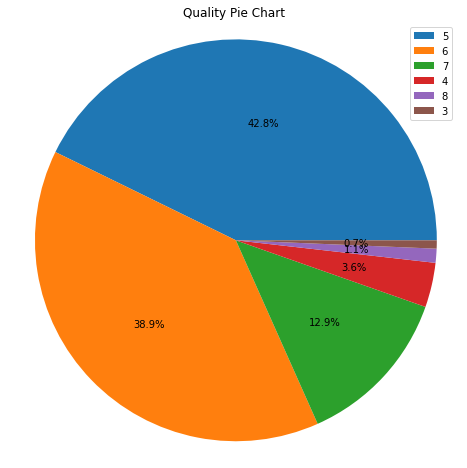

In [11]:
plt.figure(figsize = (8,8))
labels = df.quality.value_counts().index
plt.pie(df.quality.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()


## Compute pairwise correlation of columns

In [12]:
c = df.corr()
c['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.377449
sulphates               0.253316
citric_acid             0.233458
fixed_acidity           0.138583
id                      0.073022
density                 0.045603
residual_sugar          0.016327
pH                     -0.018068
free_sulfur_dioxide    -0.049119
chlorides              -0.085691
total_sulfur_dioxide   -0.185431
flavonoids             -0.199290
volatile_acidity       -0.377123
Name: quality, dtype: float64

I will use some variables which have maximum corelation with response variable 'quality' in the future analysis.

## Dealing with Outliers

In [257]:
# First way to deal with outlier is delete them
#df.drop(df.loc[ (df['alcohol']<=5) | (df['alcohol']>16) ].index,inplace=True)
    

Outlier refers to a set of measured values with a deviation of more than two standard deviations from the mean, and a deviation of more than three standard deviations from the mean, which is called a highly abnormal outlier.


In [258]:
'''
df['mean']=df.groupby("grade")['alcohol'].transform('mean')
df['std']=df.groupby("grade")['alcohol'].transform('std')
#abs(x1-x.mean)>2*x.std
df['alcohol']=df.apply(lambda x: x['mean'] if abs( x['alcohol']-x['mean']) >2*x['std'] else x['alcohol'],axis=1)
df.drop(columns=['mean', 'std'],inplace=True)
'''

'\ndf[\'mean\']=df.groupby("grade")[\'alcohol\'].transform(\'mean\')\ndf[\'std\']=df.groupby("grade")[\'alcohol\'].transform(\'std\')\n#abs(x1-x.mean)>2*x.std\ndf[\'alcohol\']=df.apply(lambda x: x[\'mean\'] if abs( x[\'alcohol\']-x[\'mean\']) >2*x[\'std\'] else x[\'alcohol\'],axis=1)\ndf.drop(columns=[\'mean\', \'std\'],inplace=True)\n'

In [23]:
def if_outlier(df,col_name):
    
    #If the deviation between the measured value and the mean is more than two standard deviations,
    #the measured value is an outlier and is replaced by the average within the group.
    df['mean']=df.groupby('quality')[col_name].transform('mean')
    df['std']=df.groupby('quality')[col_name].transform('std')
    #abs(x1-x.mean)>2*x.std
    df[col_name]=df.apply(lambda x: x['mean'] if abs( x[col_name]-x['mean']) >1.5*x['std'] else x[col_name],axis=1)
    df.drop(columns=['mean', 'std'],inplace=True)
    return df
    

In [24]:
df=if_outlier(df,'alcohol')
df=if_outlier(df,'sulphates')
df=if_outlier(df,'citric_acid')
df=if_outlier(df,'fixed_acidity')
df=if_outlier(df,'density')
df=if_outlier(df,'residual_sugar')

In [25]:
df.dropna(axis=0, how='any', inplace=True)

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

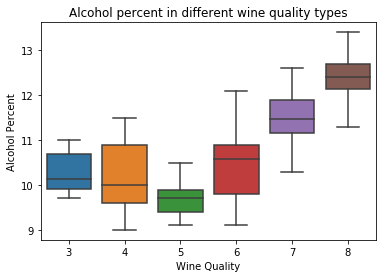

In [26]:
bx = sns.boxplot(x="quality", y='alcohol', data = df)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

[Text(0,0.5,'sulphates'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'sulphates percent in different wine quality types')]

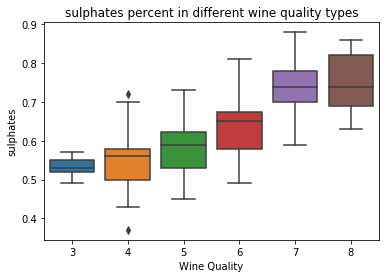

In [27]:
bx = sns.boxplot(x="quality", y='sulphates', data = df)
bx.set(xlabel='Wine Quality', ylabel='sulphates', title='sulphates percent in different wine quality types')

[Text(0,0.5,'citric_acid'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'citric_acid in different wine quality types')]

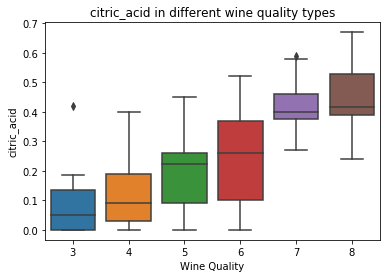

In [28]:
bx = sns.boxplot(x="quality", y='citric_acid', data = df)
bx.set(xlabel='Wine Quality', ylabel='citric_acid', title='citric_acid in different wine quality types')

[Text(0,0.5,'fixed_acidity'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'fixed_acidity in different wine quality types')]

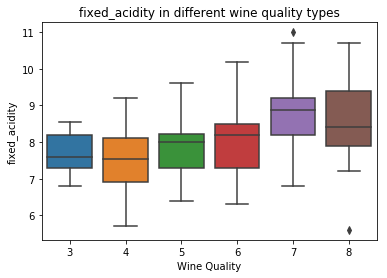

In [29]:
bx = sns.boxplot(x="quality", y='fixed_acidity', data = df)
bx.set(xlabel='Wine Quality', ylabel='fixed_acidity', title='fixed_acidity in different wine quality types')

[Text(0,0.5,'density'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'density in different wine quality types')]

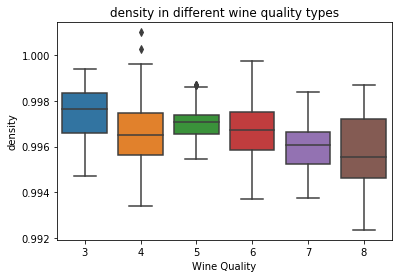

In [30]:
bx = sns.boxplot(x="quality", y='density', data = df)
bx.set(xlabel='Wine Quality', ylabel='density', title='density in different wine quality types')

## Data Prediction
we use columns ['alcohol','sulphates','citric_acid','fixed_acidity','density','residual_sugar'] to do predict.

In [31]:
from sklearn.model_selection import train_test_split
X=df.loc[:,['alcohol','sulphates','citric_acid','fixed_acidity','density','residual_sugar']]
y=df['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# random_state makes your split will be always the same. 

In [32]:
X_train.shape

(1128, 6)

## KRR

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
clf= KNeighborsClassifier(n_neighbors=3)

In [35]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [36]:
y_predict=clf.predict(X_test)

In [37]:
sum(y_predict==y_test)/len(y_test) 

0.7207446808510638

## SVM

In [38]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test) 

0.6728723404255319

In [39]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
clf.score(X_test, y_test) 

0.6808510638297872

In [40]:
from sklearn import svm
clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)
clf.score(X_test, y_test) 

0.7047872340425532

## cross-validated

In [41]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

clf1_001 = svm.SVC(kernel='rbf', C=1 , gamma=0.01)

clf5_001 = svm.SVC(kernel='rbf', C=5,gamma=0.01)

clf10_001 = svm.SVC(kernel='rbf', C=10,gamma=0.01)


clf1_01 = svm.SVC(kernel='rbf', C=1,gamma=0.1)


clf5_01 = svm.SVC(kernel='rbf', C=5,gamma=0.1)

clf10_01 = svm.SVC(kernel='rbf', C=10,gamma=0.1)

clf1_1 = svm.SVC(kernel='rbf', C=1,gamma=1)

clf5_1 = svm.SVC(kernel='rbf', C=5,gamma=1)


clf10_1 = svm.SVC(kernel='rbf', C=10,gamma=1)

In [42]:
print(" cv=10 rbf")

scores = cross_val_score(clf1_001,X,y,cv=10)
c1=scores.mean()

scores = cross_val_score(clf5_001,X,y,cv=10)
c4=scores.mean()

scores = cross_val_score(clf10_001,X,y,cv=10)
c7=scores.mean()


scores = cross_val_score(clf1_01,X,y,cv=10)
c2=scores.mean()

scores = cross_val_score(clf5_01,X,y,cv=10)
c5=scores.mean()

scores = cross_val_score(clf10_01,X,y,cv=10)
c8=scores.mean()


scores = cross_val_score(clf1_1,X,y,cv=10)
c3=scores.mean()

scores = cross_val_score(clf5_1,X,y,cv=10)
c6=scores.mean()

scores = cross_val_score(clf10_1,X,y,cv=10)
c9=scores.mean()

print('C\gamma   0.01     0.1       1')
print('1.              ',c1,'   ',c2,'  ',c3)
print('5.              ',c4,'   ',c5,'  ',c6)
print('10             ',c7,'   ',c8,'  ',c9)

 cv=10 rbf


D:\software\programs\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
D:\software\programs\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
D:\software\programs\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
D:\software\programs\ANACONDA\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 9 members, w

C\gamma   0.01     0.1       1
1.               0.6815295795284106     0.6981210076604959    0.7265915686043394
5.               0.6939524849639149     0.694819123606517    0.7337288461489411
10              0.7006121546483435     0.707474845196987    0.7356053150225674
